In [1]:
import pandas as pd
import html
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'C:\Users\sowmy\Desktop\Technocolabs\Datasets\TwitterData\TSLA.csv')
df

,Datetime,Text
0,2020-05-31 23:57:24+00:00,"Trade #Stocks, #ETF and #Options on #Webull! O..."
1,2020-05-31 23:56:26+00:00,Your #free #stock is waiting for you! Join #Ro...
2,2020-05-31 23:35:46+00:00,Quick Update on $TSLA - Wave 4 triangle has co...
3,2020-05-31 23:00:24+00:00,"#TSLA knocks out @AlamedaCounty. Finally, #Tes..."
4,2020-05-31 21:25:27+00:00,Added some $SPCE Friday - want to build a larg...
...,...,...
75565,2021-04-01 00:14:19+00:00,@Ali_Tesla585 I’m going to say that I’ve decid...
75566,2021-04-01 00:10:05+00:00,Tesla (TSLA) could surprise with strong delive...
75567,2021-04-01 00:07:15+00:00,He banged my line i gotta change my number ...
75568,2021-04-01 00:02:27+00:00,It’s so funny how people still think #Tsla is ...


In [3]:
TSLA_clean = df.drop_duplicates('Text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
TSLA_clean.Text = TSLA_clean.Text.str.lower() #convert text to lower case
TSLA_clean.Text = TSLA_clean.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
TSLA_clean.Text = TSLA_clean.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
TSLA_clean.Text = TSLA_clean.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
TSLA_clean.Text = TSLA_clean.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

def getSubjectivity(TSLA_clean):
    return TextBlob(TSLA_clean).sentiment.subjectivity

def getPolarity(TSLA_clean):
    return TextBlob(TSLA_clean).sentiment.polarity


def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"    

TSLA_clean['Subjectivity'] = TSLA_clean['Text'].apply(getSubjectivity)
TSLA_clean['Polarity'] = TSLA_clean['Text'].apply(getPolarity)
TSLA_clean["Score"] = TSLA_clean['Polarity'].apply(getTextAnalysis)
TSLA_clean

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-3-db66961f681d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA_clean['Subjectivity'] = TSLA_clean['Text'].apply(getSubjectivity)
<ipython-input-3-db66961f681d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Datetime,Text,Subjectivity,Polarity,Score
0,2020-05-31 23:57:24+00:00,trade stocks etf and options on webull open an...,0.525000,0.200000,Positive
1,2020-05-31 23:56:26+00:00,your free stock is waiting for you join robinh...,0.800000,0.400000,Positive
2,2020-05-31 23:35:46+00:00,quick update on tsla wave 4 triangle has comp...,0.700000,0.284667,Positive
3,2020-05-31 23:00:24+00:00,tsla knocks out finally tesla reopened with o...,0.666667,0.333333,Positive
4,2020-05-31 21:25:27+00:00,added some spce friday want to build a larger...,0.516667,0.350000,Positive
...,...,...,...,...,...
75565,2021-04-01 00:14:19+00:00,im going to say that ive decided nikola actua...,0.600000,0.700000,Positive
75566,2021-04-01 00:10:05+00:00,tesla tsla could surprise with strong deliveri...,0.733333,0.433333,Positive
75567,2021-04-01 00:07:15+00:00,he banged my line i gotta change my number ...,0.500000,0.500000,Positive
75568,2021-04-01 00:02:27+00:00,its so funny how people still think tsla is in...,1.000000,0.250000,Positive


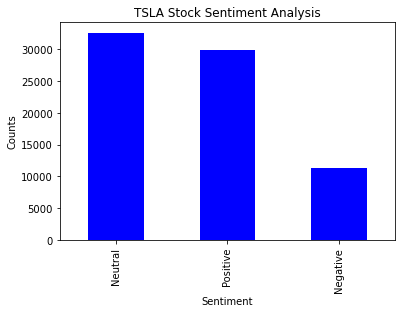

In [8]:
TSLA_clean['Score'].value_counts()

plt.title('TSLA Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
TSLA_clean['Score'].value_counts().plot(kind = 'bar', color='BLUE')
plt.show()

<ipython-input-7-91f6f638c32a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  TSLA_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],


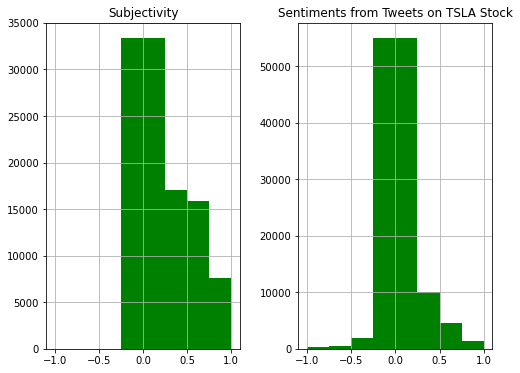

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
TSLA_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on TSLA Stock")
plt.show()

In [4]:
segment = pd.get_dummies(TSLA_clean['Score'])
segment

,Negative,Neutral,Positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
75565,0,0,1
75566,0,0,1
75567,0,0,1
75568,0,0,1


In [5]:
joined_df = pd.concat([TSLA_clean, segment], axis = 1)
joined_df['Datetime'] = pd.to_datetime(joined_df.Datetime, errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')

datetime_list = joined_df["Datetime"].tolist()
df1 = joined_df.groupby([joined_df['Datetime'].dt.date]).sum()
df1

,Subjectivity,Polarity,Negative,Neutral,Positive
Datetime,,,,,
2020-01-01,12.142623,4.799394,3.0,3.0,17.0
2020-01-02,18.918468,5.715872,4.0,20.0,29.0
2020-01-03,27.399738,6.882955,14.0,43.0,32.0
2020-01-04,12.809630,3.268403,6.0,23.0,16.0
2020-01-05,9.567045,4.180682,4.0,7.0,12.0
...,...,...,...,...,...
2021-09-16,27.801149,4.127459,14.0,33.0,34.0
2021-09-17,23.491549,4.186057,14.0,42.0,28.0
2021-09-18,21.081205,5.753481,11.0,23.0,33.0


In [7]:
df2 = df1#.drop(['Subjectivity','Polarity'],axis=1)
df2.reset_index(inplace=True)
df2.head()

,index,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive
0,0,2020-01-01,12.142623,4.799394,3.0,3.0,17.0
1,1,2020-01-02,18.918468,5.715872,4.0,20.0,29.0
2,2,2020-01-03,27.399738,6.882955,14.0,43.0,32.0
3,3,2020-01-04,12.809630,3.268403,6.0,23.0,16.0
4,4,2020-01-05,9.567045,4.180682,4.0,7.0,12.0


In [8]:
col_list = list(df2)
col_list.remove('Datetime')
df2['Total_Tweets'] = df2[col_list].sum(axis=1)
df2['Datetime']=pd.to_datetime(df2.Datetime, format='%Y/%m/%d %H:%M:%S.%f')
df2['Year'] = df2['Datetime'].dt.year
df2['Month'] = df2['Datetime'].dt.month
df2['Day'] = df2['Datetime'].dt.day
df2.head()

,index,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,0,2020-01-01,12.142623,4.799394,3.0,3.0,17.0,39.942017,2020,1,1
1,1,2020-01-02,18.918468,5.715872,4.0,20.0,29.0,78.634340,2020,1,2
2,2,2020-01-03,27.399738,6.882955,14.0,43.0,32.0,125.282693,2020,1,3
3,3,2020-01-04,12.809630,3.268403,6.0,23.0,16.0,64.078032,2020,1,4
4,4,2020-01-05,9.567045,4.180682,4.0,7.0,12.0,40.747727,2020,1,5


In [9]:
df2.to_csv('EDA_Tsla.csv', index=False)

In [9]:
df_3 = pd.read_csv('C:/Users/sowmy/Desktop/Technocolabs/Datasets/FinancialData/TSLA.csv')

In [13]:
df_3['Date'] = pd.to_datetime(df_3['Date']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df2.rename(columns = {'Datetime':'Date'}, inplace = True)
df_3['Date'] = pd.to_datetime(df_3.Date, errors='coerce',format='%Y/%m/%d')
df_3.rename(columns = {'Close/Last':'Close'}, inplace = True)
df_3

,Date,Close,Volume,Open,High,Low
0,2021-09-21,$739.38,16330720.0,$734.79,$744.7399,$730.44
1,2021-09-20,$730.17,24757650.0,$734.5577,$742,$718.6249
2,2021-09-17,$759.49,28204180.0,$757.15,$761.04,$750
3,2021-09-16,$756.99,13923390.0,$752.83,$758.91,$747.61
4,2021-09-15,$755.83,15357690.0,$745,$756.86,$738.36
...,...,...,...,...,...,...
1246,NaT,NaN,NaN,NaN,NaN,NaN
1247,NaT,NaN,NaN,NaN,NaN,NaN
1248,NaT,NaN,NaN,NaN,NaN,NaN
1249,NaT,NaN,NaN,NaN,NaN,NaN


In [14]:
# Merge the two dataframes, using _ID column as key
merge_left = pd.merge(df2, df_3, on = 'Date', how='left')
merge_left.set_index('Date', inplace = True)
# Write it to a new CSV file
#df3.to_csv('CSV3.csv')

In [15]:
merge_left.reset_index(inplace=True)
merge_left['Close'] = merge_left['Close'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Open'] = merge_left['Open'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Low'] = merge_left['Low'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['High'] = merge_left['High'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['dayOfWeek'] = merge_left['Date'].dt.day_name()
merge_2 = merge_left.sort_index(ascending=True)

#Add stock name column = TSLA 
merge_2['Stock name']= 'TSLA'
colum_names = ['Stock name','Date','Year','Month','Day','dayOfWeek','Close','Open','High','Low','Volume','Polarity','Subjectivity','Positive','Negative','Neutral','Total_Tweets']
merge_3 = merge_2.reindex(columns=colum_names)
merge_3['Close'] = merge_3['Close'].astype(float)
merge_3['Open'] = merge_3['Open'].astype(float)
merge_3['High'] = merge_3['High'].astype(float)
merge_3['Low'] = merge_3['Low'].astype(float)
merge_4 = merge_3.interpolate(method = 'linear', limit_direction='backward')
merge_4

,Stock name,Date,Year,Month,Day,dayOfWeek,Close,Open,High,Low,Volume,Positive,Negative,Neutral,Total_Tweets
0,TSLA,2020-01-01,2020,1,1,Wednesday,86.052000,84.900000,86.139100,84.342000,4.779193e+07,17.0,3.0,3.0,23.0
1,TSLA,2020-01-02,2020,1,2,Thursday,86.052000,84.900000,86.139100,84.342000,4.779193e+07,29.0,4.0,20.0,53.0
2,TSLA,2020-01-03,2020,1,3,Friday,88.602000,88.100000,90.800000,87.384000,8.897350e+07,32.0,14.0,43.0,89.0
3,TSLA,2020-01-04,2020,1,4,Saturday,89.170667,88.098000,90.637333,87.589333,7.624483e+07,16.0,6.0,23.0,45.0
4,TSLA,2020-01-05,2020,1,5,Sunday,89.739333,88.096000,90.474667,87.794667,6.351617e+07,12.0,4.0,7.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TSLA,2021-09-16,2021,9,16,Thursday,756.990000,752.830000,758.910000,747.610000,1.392339e+07,34.0,14.0,33.0,81.0
594,TSLA,2021-09-17,2021,9,17,Friday,759.490000,757.150000,761.040000,750.000000,2.820418e+07,28.0,14.0,42.0,84.0
595,TSLA,2021-09-18,2021,9,18,Saturday,749.716667,749.619233,754.693333,739.541633,2.705534e+07,33.0,11.0,23.0,67.0
596,TSLA,2021-09-19,2021,9,19,Sunday,739.943333,742.088467,748.346667,729.083267,2.590649e+07,23.0,11.0,29.0,63.0


In [16]:
merge_4.to_csv('TSLA_combined.csv')

In [14]:
merge_4.dtypes

Stock name              object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dayOfWeek               object
Close                  float64
Open                   float64
High                   float64
Low                    float64
Volume                 float64
Polarity               float64
Subjectivity           float64
Positive               float64
Negative               float64
Neutral                float64
Total_Tweets           float64
dtype: object